In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import Image

data = pd.read_csv("data_sets/neo_task.csv")


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90266 non-null  float64
 1   name                90790 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90379 non-null  float64
 4   relative_velocity   90279 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   absolute_magnitude  90152 non-null  float64
 7   hazardous           90836 non-null  bool   
dtypes: bool(1), float64(6), object(1)
memory usage: 4.9+ MB


In [51]:
data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,3561024.0,(2011 GZ2),0.016016,0.035813,56014.078517,1.024333e+06,26.1,False
1,54016766.0,(2020 HT6),0.030518,0.068240,7864.348060,3.268186e+07,24.7,False
2,3746620.0,(2016 ED156),0.055533,0.124177,55257.544508,6.538636e+07,23.4,False
3,3633054.0,(2013 FD8),0.019256,0.043057,41531.404722,1.260796e+07,25.7,False
4,3742124.0,(2016 CW31),0.139494,0.311918,67639.394481,7.130590e+07,21.4,False


### Датасет содержит следующие поля:
* `id` - идентификатор
* `name` - название
* `est_diameter_min` - минимальный расчетный диаметр
* `est_diameter_max` - максимальный расчетный диаметр
* `relative_velocity` - относительная скорость
* `miss_distance` - дистанция пролета / минимальная дистанция
* `absolute_magnitude` - абсолютная звездная величина
* `hazardous` - опасность


## Редактирование данных

In [52]:
data.duplicated().sum()

np.int64(0)

В датасете нет дубликатов.

Удалим из датасета столбцы id и name, так как они не влияют на опасность объекта.

In [53]:
data = data.drop(["id", "name"], axis=1)

Изучим пропуски в датасете.

In [54]:
data.isna().sum()

est_diameter_min        0
est_diameter_max      457
relative_velocity     557
miss_distance           0
absolute_magnitude    684
hazardous               0
dtype: int64

Пропуски есть в столбцах `est_diameter_max`, `relative_velocity`, `absolute_magnitude`.

Заполним пропуски `est_diameter_max` путем прибавления к `est_diameter_min` медианного значения (для того, чтобы максимум не оказался меньше минимума).

Заполним пропуски в `relative_velocity` и `absolute_magnitude`  медианным значением по данным столбцам соответственно.

Выбор медианного значения обусловлен тем, что не исключено наличие выбросов в датасете, а медианное значение устойчиво к ним.

In [55]:
data["est_diameter_max"] = data["est_diameter_max"].fillna(data["est_diameter_min"] + data["est_diameter_max"].median())

data["relative_velocity"] = data["relative_velocity"].fillna(data["relative_velocity"].median())
data["absolute_magnitude"] = data["absolute_magnitude"].fillna(data["absolute_magnitude"].median())

In [56]:
data.isna().sum()

est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64

Изменим тип данных для столбца `hazardous` на int.

In [57]:
data["hazardous"] = data["hazardous"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_diameter_min    90836 non-null  float64
 1   est_diameter_max    90836 non-null  float64
 2   relative_velocity   90836 non-null  float64
 3   miss_distance       90836 non-null  float64
 4   absolute_magnitude  90836 non-null  float64
 5   hazardous           90836 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 4.2 MB


## Статистический анализ данных

In [58]:
data.describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
count,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000,90836.000000
mean,0.127432,0.284679,48042.236980,3.706655e+07,23.527958,0.097318
std,0.298511,0.666678,25218.666659,2.235204e+07,2.883104,0.296392
min,0.000609,0.001362,203.346433,6.745533e+03,9.230000,0.000000
25%,0.019256,0.043057,28714.148508,1.721082e+07,21.380000,0.000000
50%,0.048368,0.108153,44190.108201,3.784658e+07,23.700000,0.000000
75%,0.143402,0.320656,62804.910500,5.654900e+07,25.700000,0.000000
max,37.892650,84.730541,236990.128088,7.479865e+07,33.200000,1.000000


`hazardous`

Среднее значение - 0.097, а медиана - 0.

_Большая часть астероидов не представляет опасности._

Проанализируем размерные характеристики астероидов - `est_diameter_min` и `est_diameter_max`.

`est_diameter_min`

Среднее значение - 0.12, медиана - 0.04.

`est_diameter_max`

Среднее значение - 0.28, медиана - 0.1.

_Значения для минимального расчетного диаметра и максимального расчетного диаметра "скошены" вправо. Возможно, что большая часть астероидов имеют небольшие размеры, а потому большинство астероидов не представляют опасности.
Встречаются как особо мелкие объекты (с минимальным расчетным диаметром 0.0006), так и более крупные (с минимальным расчетным диаметром 37.8)._

`relative_velocity`

Среднее значение - 48042.2, медиана - 44190.1.

_Большая часть астероидов обладает типичной для таких астрономических объектов скоростью. При этом встречаются и особо медленные объекты со скоростью 203, так и более быстрые со скоростью 236990._

`miss_distance`

Среднее значение - 37.0 млн., медиана - 37.8 млн.

_Медиана практически равна среднему. Это говорит о том, что около половины астероидов приблизились к Земле по крайней мере на 37 млн._

`absolute_magnitude`

_Среднее значение - 23.5, медиана - 23.7. Большая часть объектов являются тусклыми. При этом минимальное значение данной характеристики - 2.8. Значит, в данных существуют особенно яркие объекты. Возможно, это влияет на их степень опасности._


## Визуализации данных

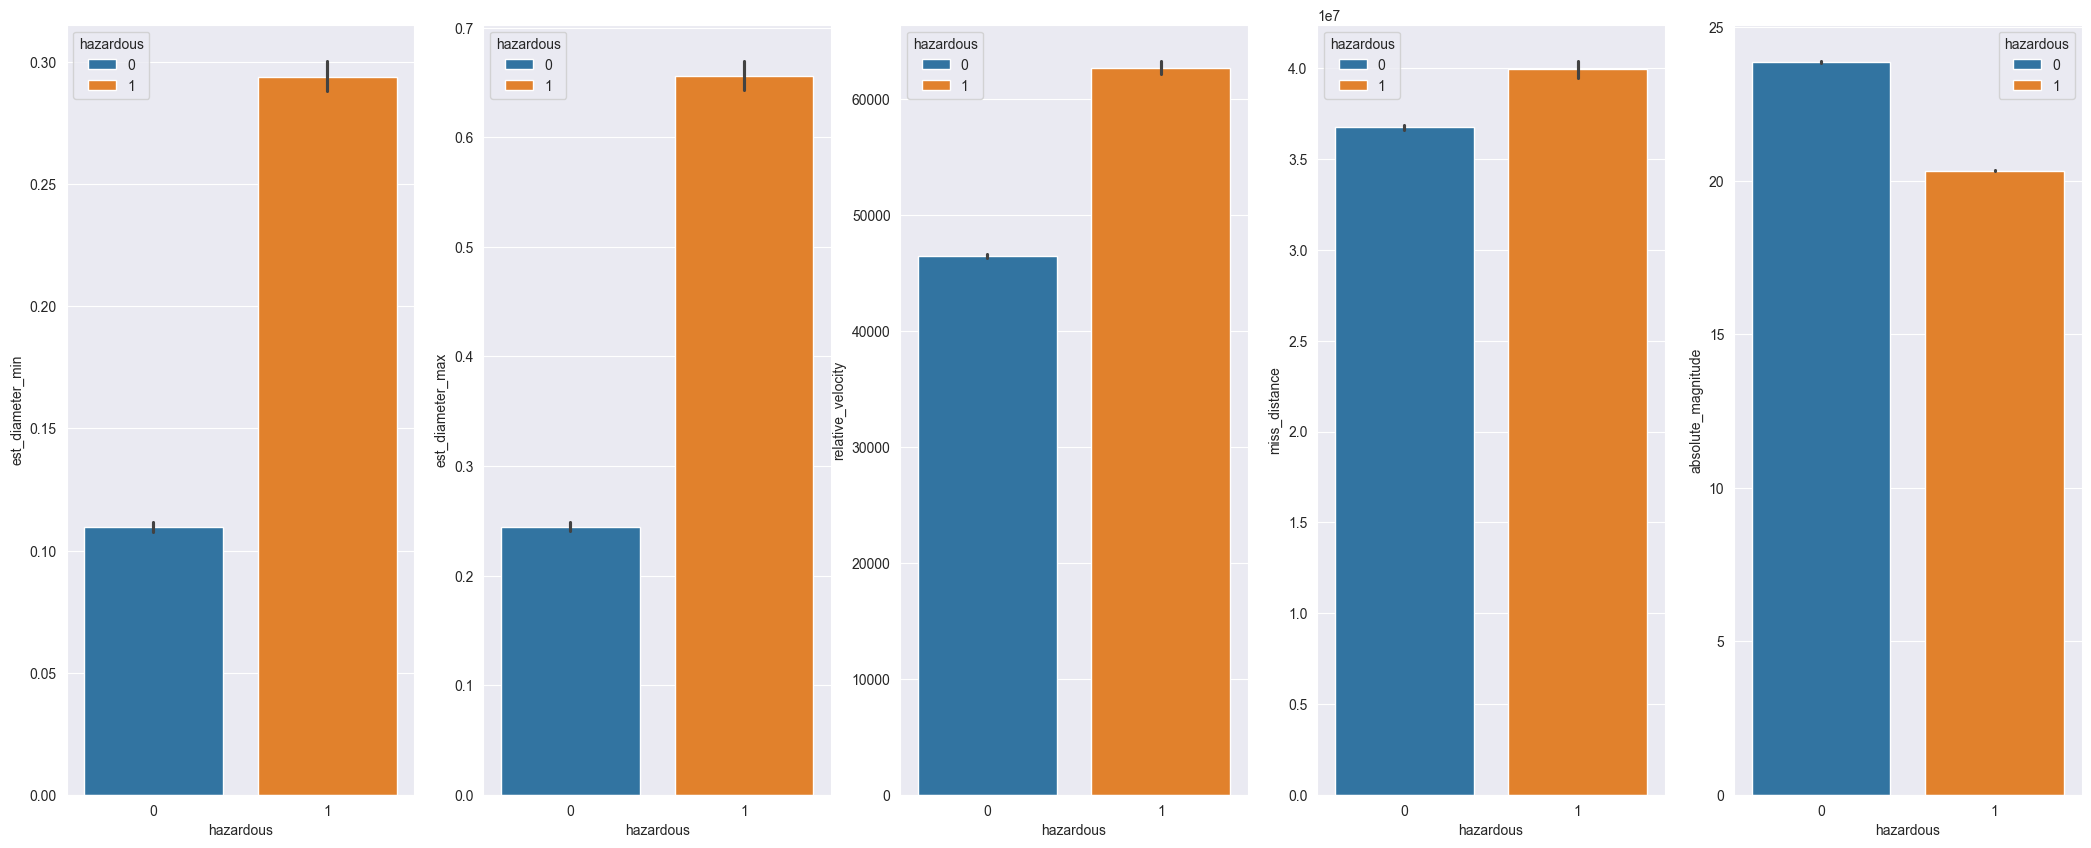

In [59]:
columns = data.columns.drop("hazardous")
fig, ax = plt.subplots(1, 5, figsize=(26, 10))
for i in range(len(columns)):
    sns.barplot(data, x="hazardous", y=columns[i], ax=ax[i], hue="hazardous")

Из столбчатых диаграмм для `est_diameter_min` и `est_diameter_max` видно, что опасные объекты имели гораздо большие размеры, чем неопасные.

Из диаграммы для `relative_velocity` можно понять, что скорость опасных объектов превышает скорость неопасных объектов на 15-20 тыс.

Из диаграммы для `miss_distance` видно, что среднее расстояние пролета для опасных объектов примерно на 0.3 млн. превышает среднее расстояние пролета для неопасных объектов. Значит, в среднем опасные и неопасные объекты имели примерно одинаковое расстояние пролета. Возможно, что эта характеристика не оказывает значительного влияния на опасность объекта.

Из диаграммы для `absolute_magnitude` видно, что абсолютная звездная величина для неопасных объектов превышает абсолютную звездную величину для опасных объектов примерно на 3-4 единицы. Значит, в среднем значение `absolute_magnitude` для опасных объектов меньше, чем для неопасных. Это говорит о том, что опасные объекты обладали большей светимостью, чем неопасные.

array([[<Axes: title={'center': 'est_diameter_min'}>,
        <Axes: title={'center': 'est_diameter_max'}>],
       [<Axes: title={'center': 'relative_velocity'}>,
        <Axes: title={'center': 'miss_distance'}>],
       [<Axes: title={'center': 'absolute_magnitude'}>,
        <Axes: title={'center': 'hazardous'}>]], dtype=object)

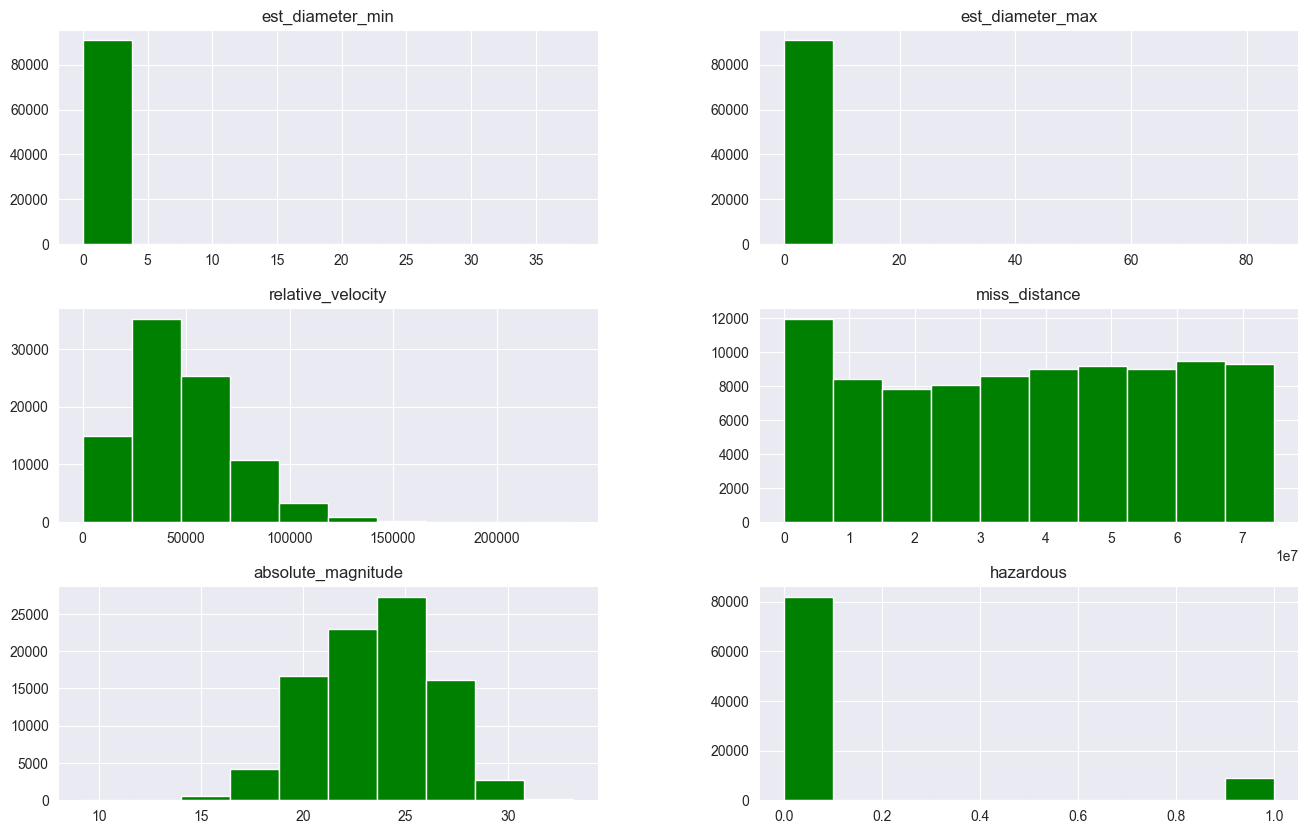

In [60]:
data.hist(figsize=(16, 10), color="green")

Из гистограммы для `hazardous` видно, что примерно 80 процентов астероидов сочли неопасными.

Из графиков для максимального и минимального расчетных диаметров можно понять, что среди астероидов есть особо крупные.

Из гистограммы для `relative_velocity` видно, что большая часть астероидов двигалась со скоростью в пределах от 45 до 55 тыс., но также попадаются и особо быстрые со скоростью, превосходящей 150 тыс., так и сравнительно медленные со скоростью, меньшей 25 тыс. Возможно, что особо быстрые объекты считают опасными.

Из графика для `miss_distance` видно, что были особо близкие к Земле объекты. Возможно, что из-за особо близкого к Земле расстояния их посчитали опасными.

Из гистограммы для `absolute_magnitude` видно, что большая часть объектов обладает абсолютной звездной величиной в диапазоне от 20 до 25. Это значит, что большая часть объектов являются тусклыми. При этом есть объекты особо яркие, т.е. с абсолютной звездной величиной, меньше 10. Возможно, что особо яркие объекты могли посчитать опасными.

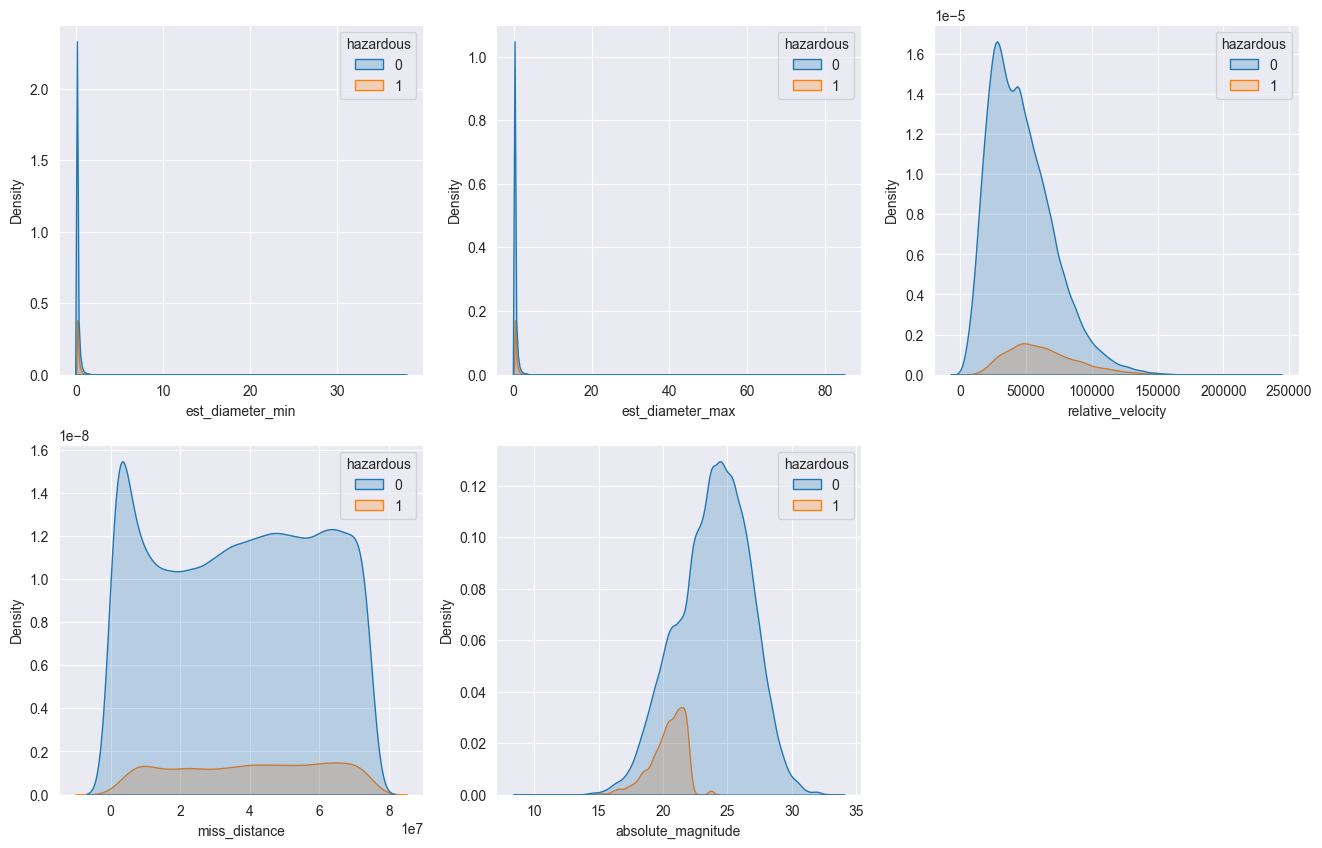

In [61]:
fig, ax = plt.subplots(2, 3, figsize = (16, 10))
ax_flatten = ax.flatten()
for i in range(len(data.columns) - 1):
    sns.kdeplot(data, x=data.columns[i], ax=ax_flatten[i], fill=True, hue="hazardous")
ax_flatten[i+1].set_visible(False)


`est_diameter_min` и `est_diameter_max`

Большинство объектов мелкие, так как пик находится в окрестности нуля. Из длины "хвоста" можно заметить, что иногда попадаются особо крупные объекты.

При этом пик оранжевой кривой, соответствующей опасным объектам, более гладкий, чем пик синей кривой, соответствующей неопасным объектам. Это говорит о том, что среди небольших объектов (чей диаметр лежит в окресности нуля) опасными становятся наиболее крупные из этой группы, а среди очень больших объектов (с диаметром, большим 10) наиболее крупные из этой группы могут оказаться неопасными.

`relative_velocity`

Пик для оранжевой кривой, соответствующей опасным объектам, более "растянутый", чем для пика синей кривой, соответствующей неопасным объектам. Стоит заметить, что пик синей кривой лежит немного левее, чем пик оранжевой кривой. Синяя кривая ограничивает большую площадь, чем оранжевая. Это говорит о том, что опасных объектов больше, чем неопасные, и они обладают большей относительной скоростью.

`miss_distance`

Величина расстояния пролета слабо разделяет космические объекты на опасные/неопасные. Судя по оранжевой кривой, опасные объекты могут находиться как близко к Земле, так и далеко от нее. Аналогично для синей кривой: неопасные объекты могли находиться как далеко, так и близко к Земле.

`absolute_magnitude`

По оранжевой кривой видно, что опасные объекты обладают гораздо небольшой абсолютной звездной величиной (принадлежащей интервалу от 15 до 25). В среднем неопасные объекты обладают большей абсолютной звездной величиной.


<Axes: >

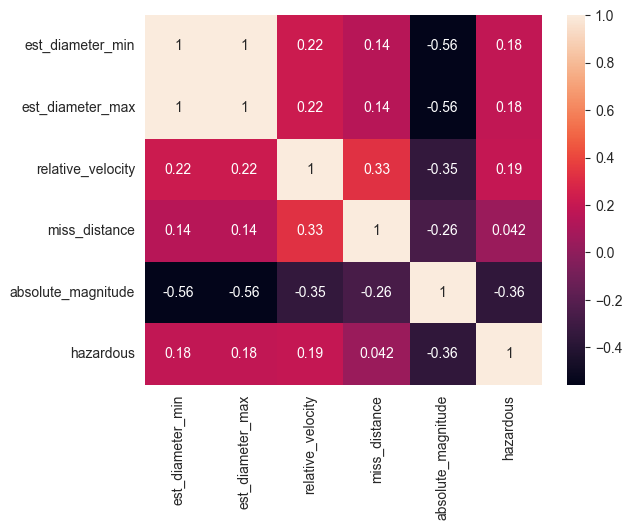

In [62]:
sns.heatmap(data.corr(), annot=True)

**Сильная корреляция**

Пара признаков `est_diameter_min` и `est_diameter_max` коррелирует с коэффициентом 1. Это логично, так как обе эти величины характеризуют размеры астероида, первая дает нижнюю оценку, а вторая верхнюю.

**Средняя корреляция**

Пара признаков `est_diameter_min` и `absolute_magnitude` коррелирует с коэффициентом -0.56. Чем больше размер астероида, тем меньше значение его абсолютной звездной величины. Так как с уменьшением абсолютной звездной величины увеличивается яркость объекта, то можно предположить, что чем крупнее объект, тем он ярче.

Пара признаков `est_diameter_max` и `absolute_magnitude` коррелирует с коэффициентом -0.56. Аналогично паре `est_diameter_min` и `absolute_magnitude`.

Пара признаков `relative_velocity` и `miss_distance` коррелирует с коэффициентом 0.33. Возможно, что при увеличении скорости объекта увеличивается величина пролетаемого расстояния.

Пара признаков `relative_velocity` и `absolute_magnitude` коррелируют с коэффициентом -0.35, то есть, чем больше скорость объекта, тем меньше его абсолютная звездная величина. Так как абсолютная звездная величина коррелирует с размером астероида, то можно сказать, что чем больше размер объекта, тем он быстрее сближается с Землей.

Пара признаков `absolute_magnitude` и `hazardous` коррелируют с коэффициентом -0.36. Чем меньше значение абсолютной звездной величины, тем вероятнее, что объект опасен.

Прочие пары признаков не были рассмотрены, так как они имеют небольшой коэффициент корреляции по абсолютному значению и практически не оказывают влияния друг на друга.

<Axes: xlabel='est_diameter_max', ylabel='relative_velocity'>

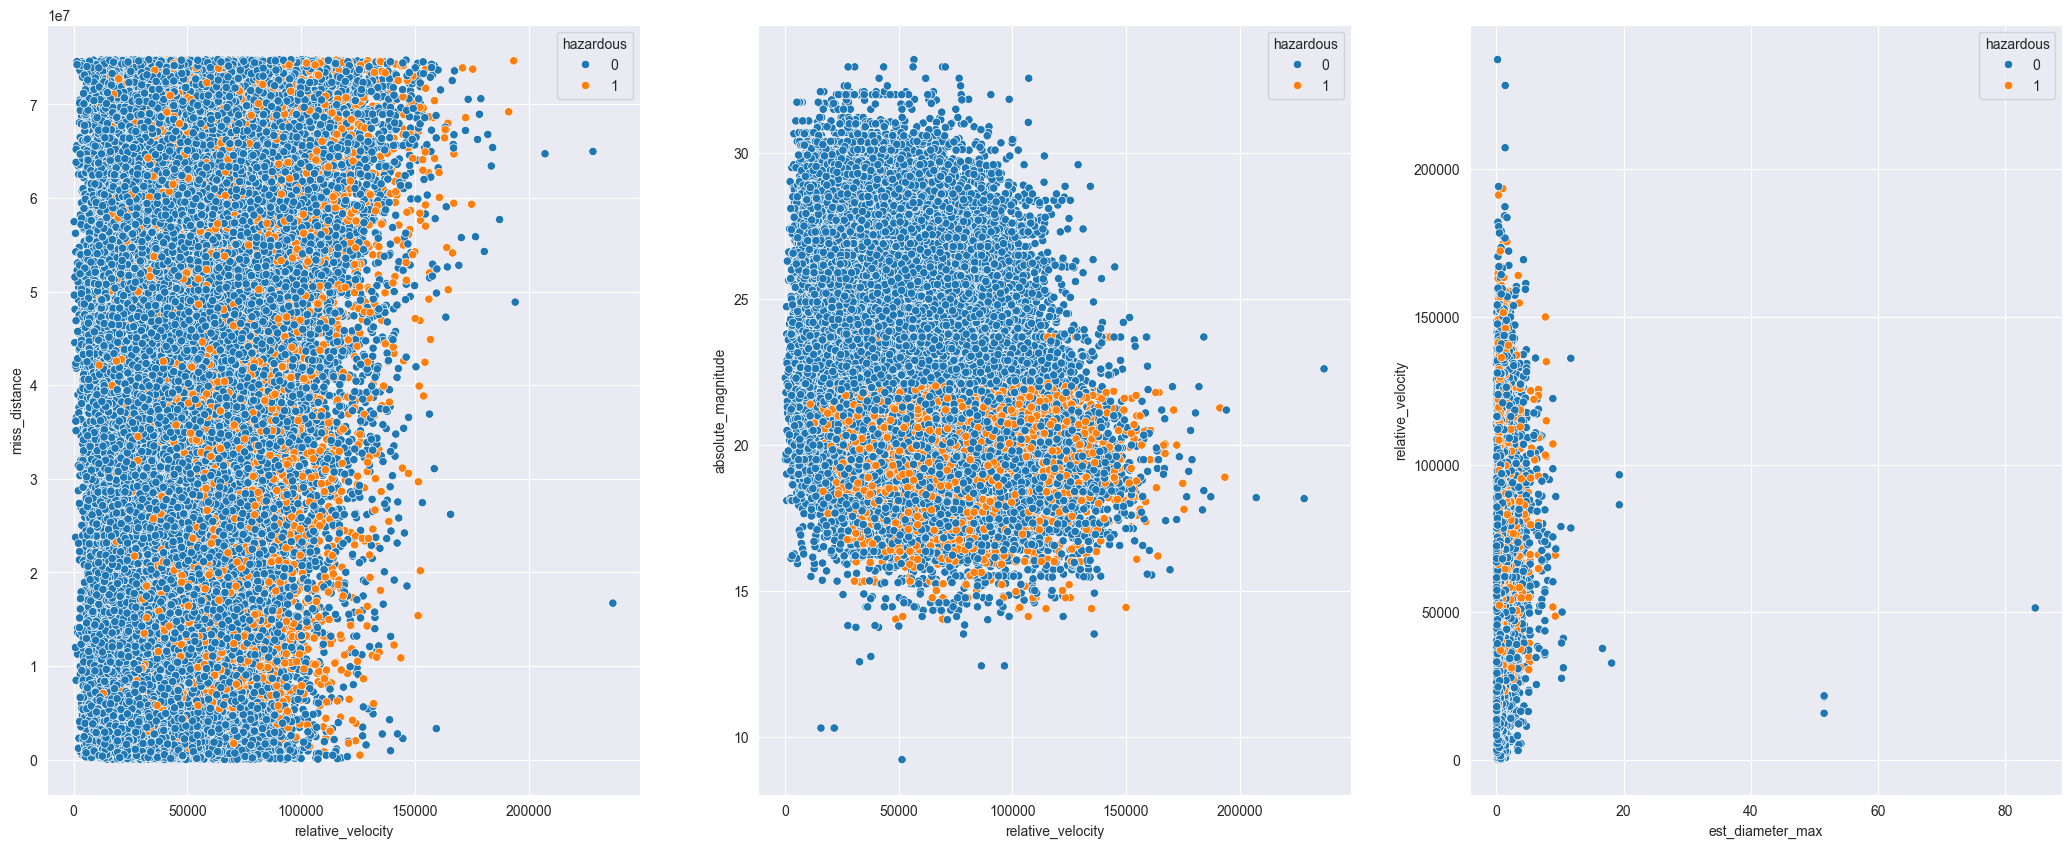

In [63]:
fig, ax = plt.subplots(1, 3, figsize=(26, 10))

sns.scatterplot(data, x="relative_velocity", y="miss_distance", ax=ax[0], hue="hazardous")
sns.scatterplot(data, x="relative_velocity", y="absolute_magnitude", ax=ax[1], hue="hazardous")
sns.scatterplot(data, x="est_diameter_max", y="relative_velocity", ax=ax[2], hue="hazardous")


Из первого графика видно, что особо быстрые объекты со скоростью, большей 150 тыс., обладали более высоким расстоянием пролета, чем объекты с более низкой скоростью.
При этом с высокой скоростью есть как опасные, так и неопасные объекты. Нельзя выявить общую закономерность для разделения опасных/неопасных объектов в зависимости от скорости и расстояния пролета.

Из второго графика видно, что большая часть неопасных объектов обладает абсолютной звездной величиной, большей, чем 23-25 единиц. При этом опасные объекты обладают абсолютной звездной величиной, меньшей 25.
Возможно, что чем ниже значение абсолютной звездной величины, тем вероятнее, что объект опасен. Из распределения точек видно, что объекты с более низкой скоростью обладают большей абсолютной звездной величиной, чем объекты с высокой скоростью. Опасные объекты могут обладать как низкой скоростью около 50000, так и высокой с более, чем 150000.

Из третьего графика видно, что большая часть объектов обладает максимальным расчетным диаметром, меньшим 20. Особенно крупные объекты с максимальным диаметром, большим 20, не обладают высокой скоростью. Высокой скоростью со значениями, большими 150000, обладают объекты с диаметром, меньшим 10.





<Axes: xlabel='absolute_magnitude', ylabel='miss_distance'>

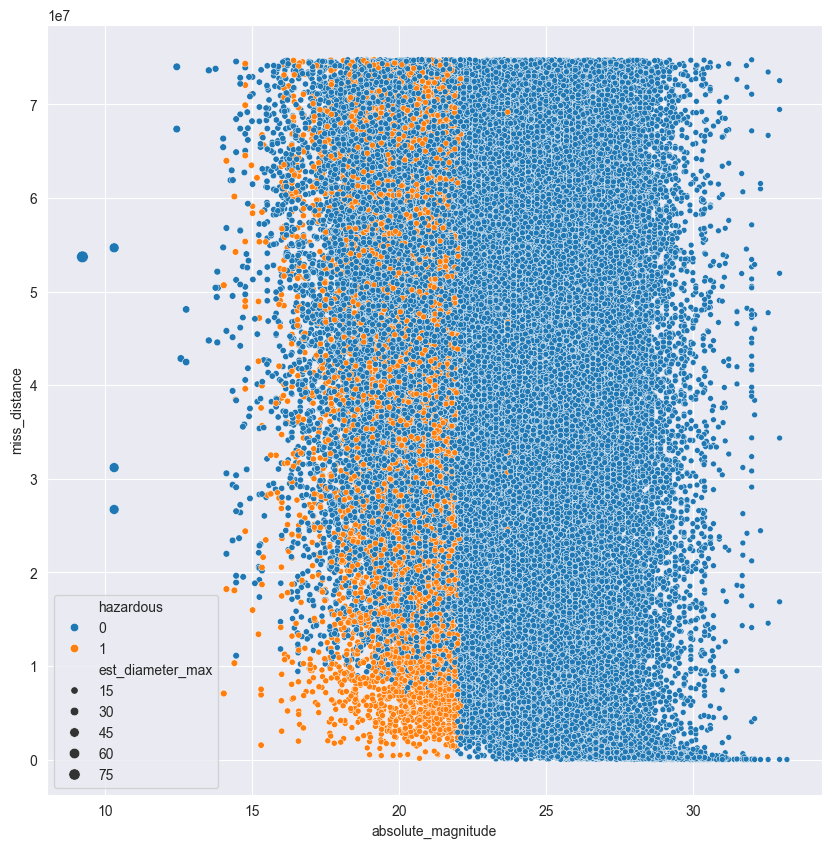

In [64]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data, x="absolute_magnitude", y="miss_distance", hue="hazardous", size="est_diameter_max")

Из графика видно, что значения абсолютной звездной величины для большинства объектов распределены в диапазоне от 10 до 30 единиц. При этом опасные объекты обладают абсолютной звездной величиной, лежащей в диапазоне от 15 до 20. Возможно, что чем меньше значение абсолютной звездной величины, тем вероятнее, что объект опасен.

<Axes: xlabel='est_diameter_max', ylabel='est_diameter_min'>

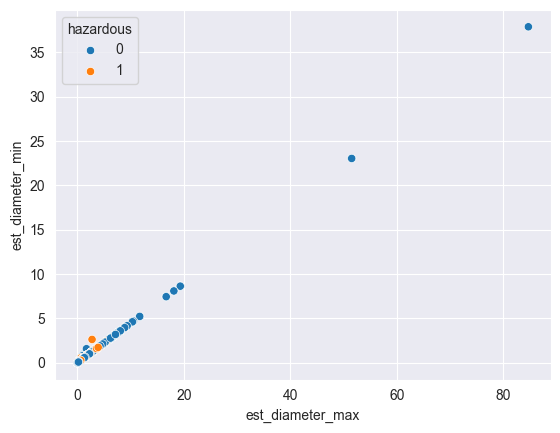

In [65]:
sns.scatterplot(data, x="est_diameter_max", y="est_diameter_min", hue="hazardous")

Значения est_diameter_max и est_diameter_min коррелируют, так как они практически образуют прямую. Можно заметить, что опасные объекты обладают небольшими размерами, лежащими в диапазоне от 0 до 10.

<Axes: xlabel='est_diameter_max', ylabel='absolute_magnitude'>

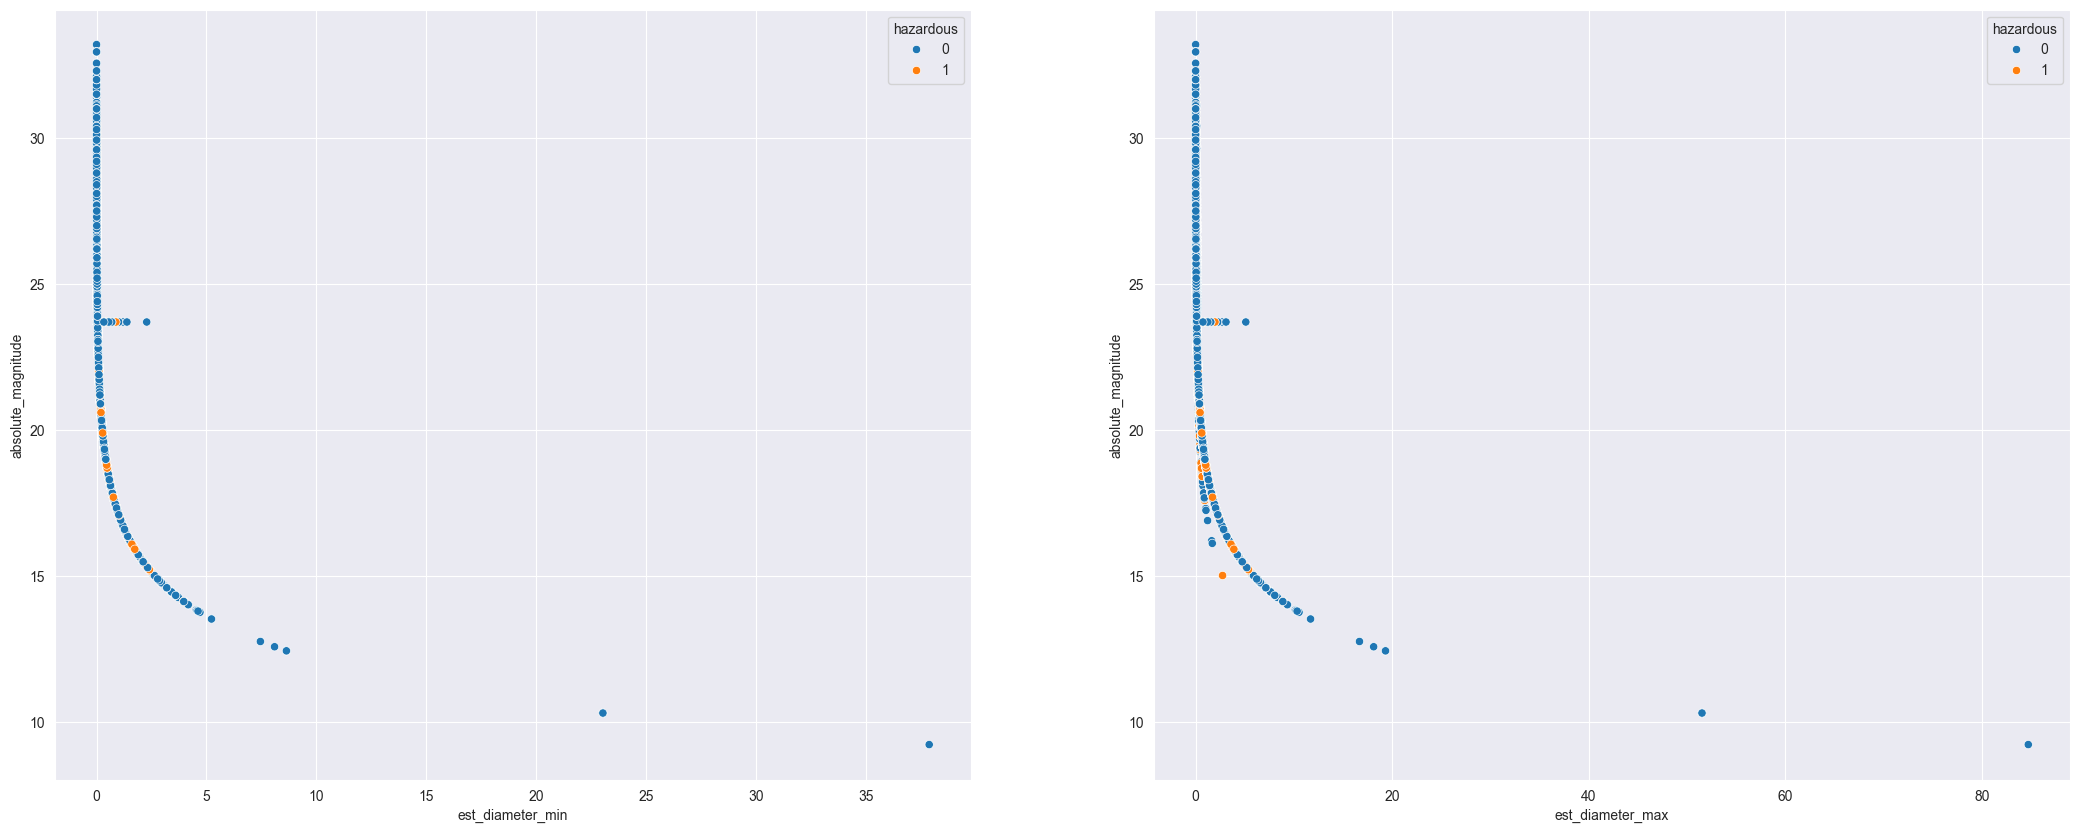

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(26, 10))
sns.scatterplot(data, x="est_diameter_min", y="absolute_magnitude", hue="hazardous", ax=ax[0])
sns.scatterplot(data, x="est_diameter_max", y="absolute_magnitude", hue="hazardous", ax=ax[1])


Можно заметить выраженную обратную пропорциональность `absolute_magnitude` и величин `est_diameter_min` и `est_diameter_max`.

Судя по графикам, чем больше объект, тем меньшей звездной величиной он обладает. Опасные объекты обладают небольшой абсолютной звездной величиной, лежащей в диапазоне от 15 до 25.

<Axes: xlabel='est_diameter_max', ylabel='miss_distance'>

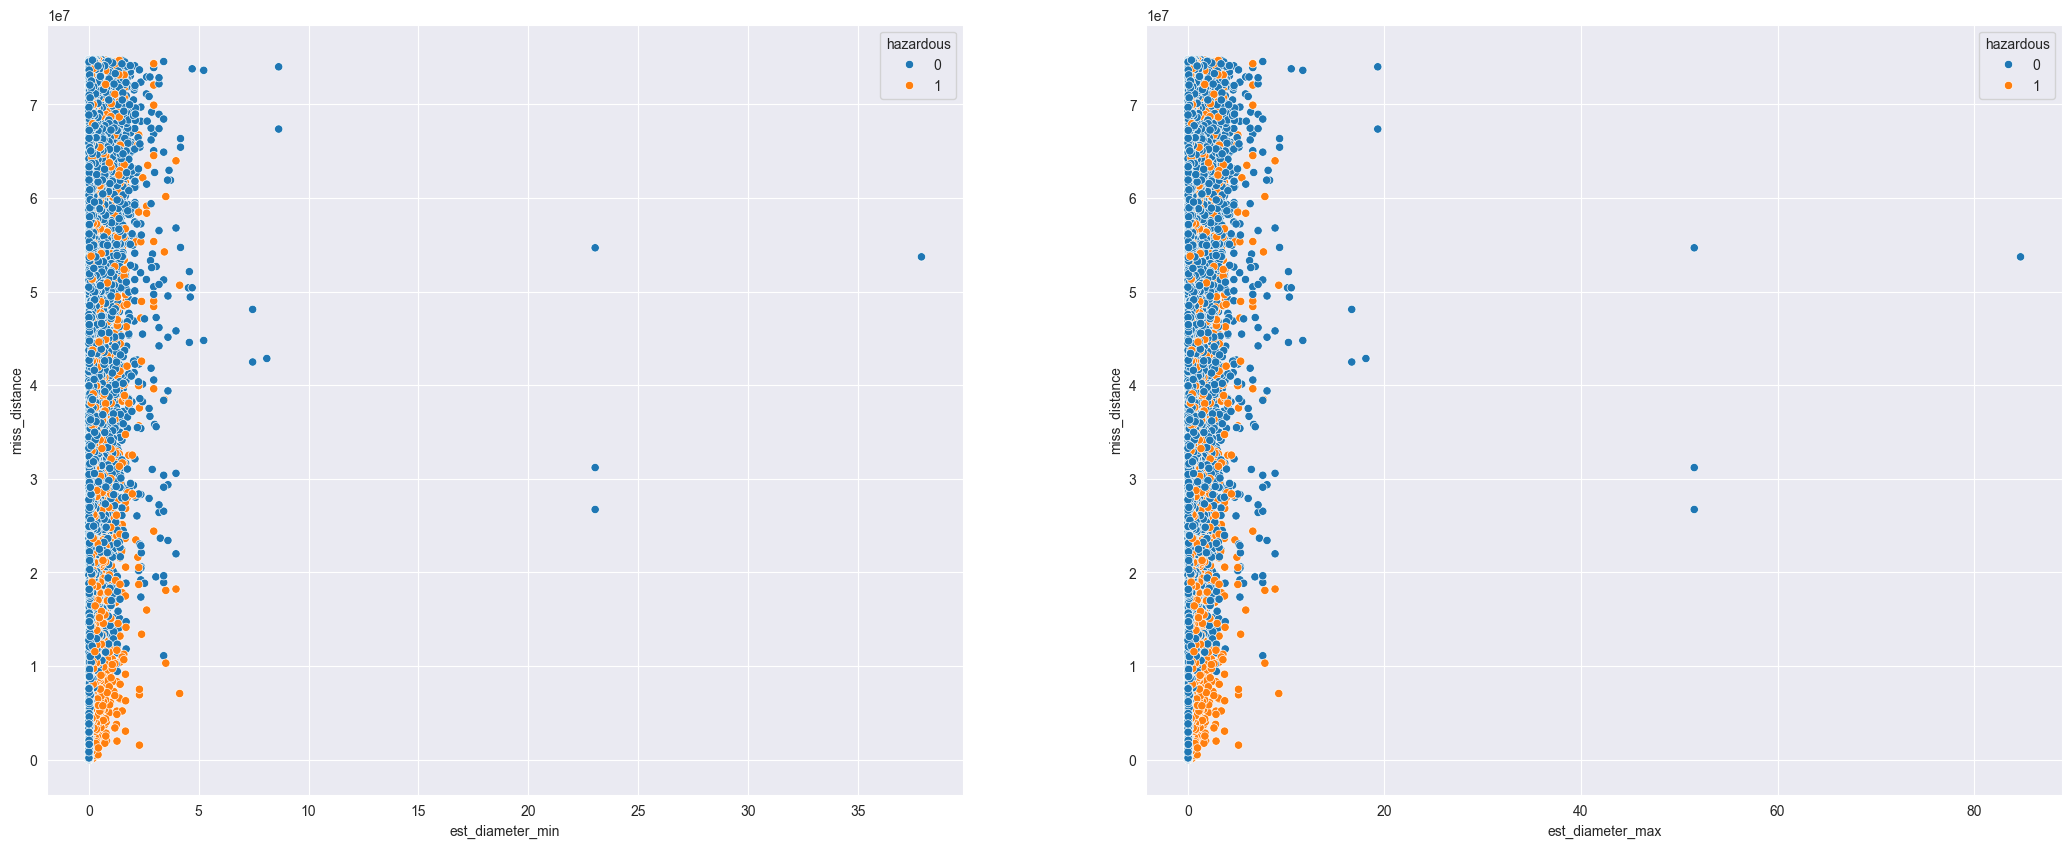

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(26, 10))
sns.scatterplot(data, x="est_diameter_min", y="miss_distance", hue="hazardous", ax=ax[0])
sns.scatterplot(data, x="est_diameter_max", y="miss_distance", hue="hazardous", ax=ax[1])

Из графиков видно, что опасные объекты могли обладать и высоким, и низким расстоянием пролета. Но при этом заметно, что чем меньше значение miss_distance, тем больше количество опасных объектов. Возможно, что чем ближе объект к Земле, тем более вероятно, что он представляет опасность.

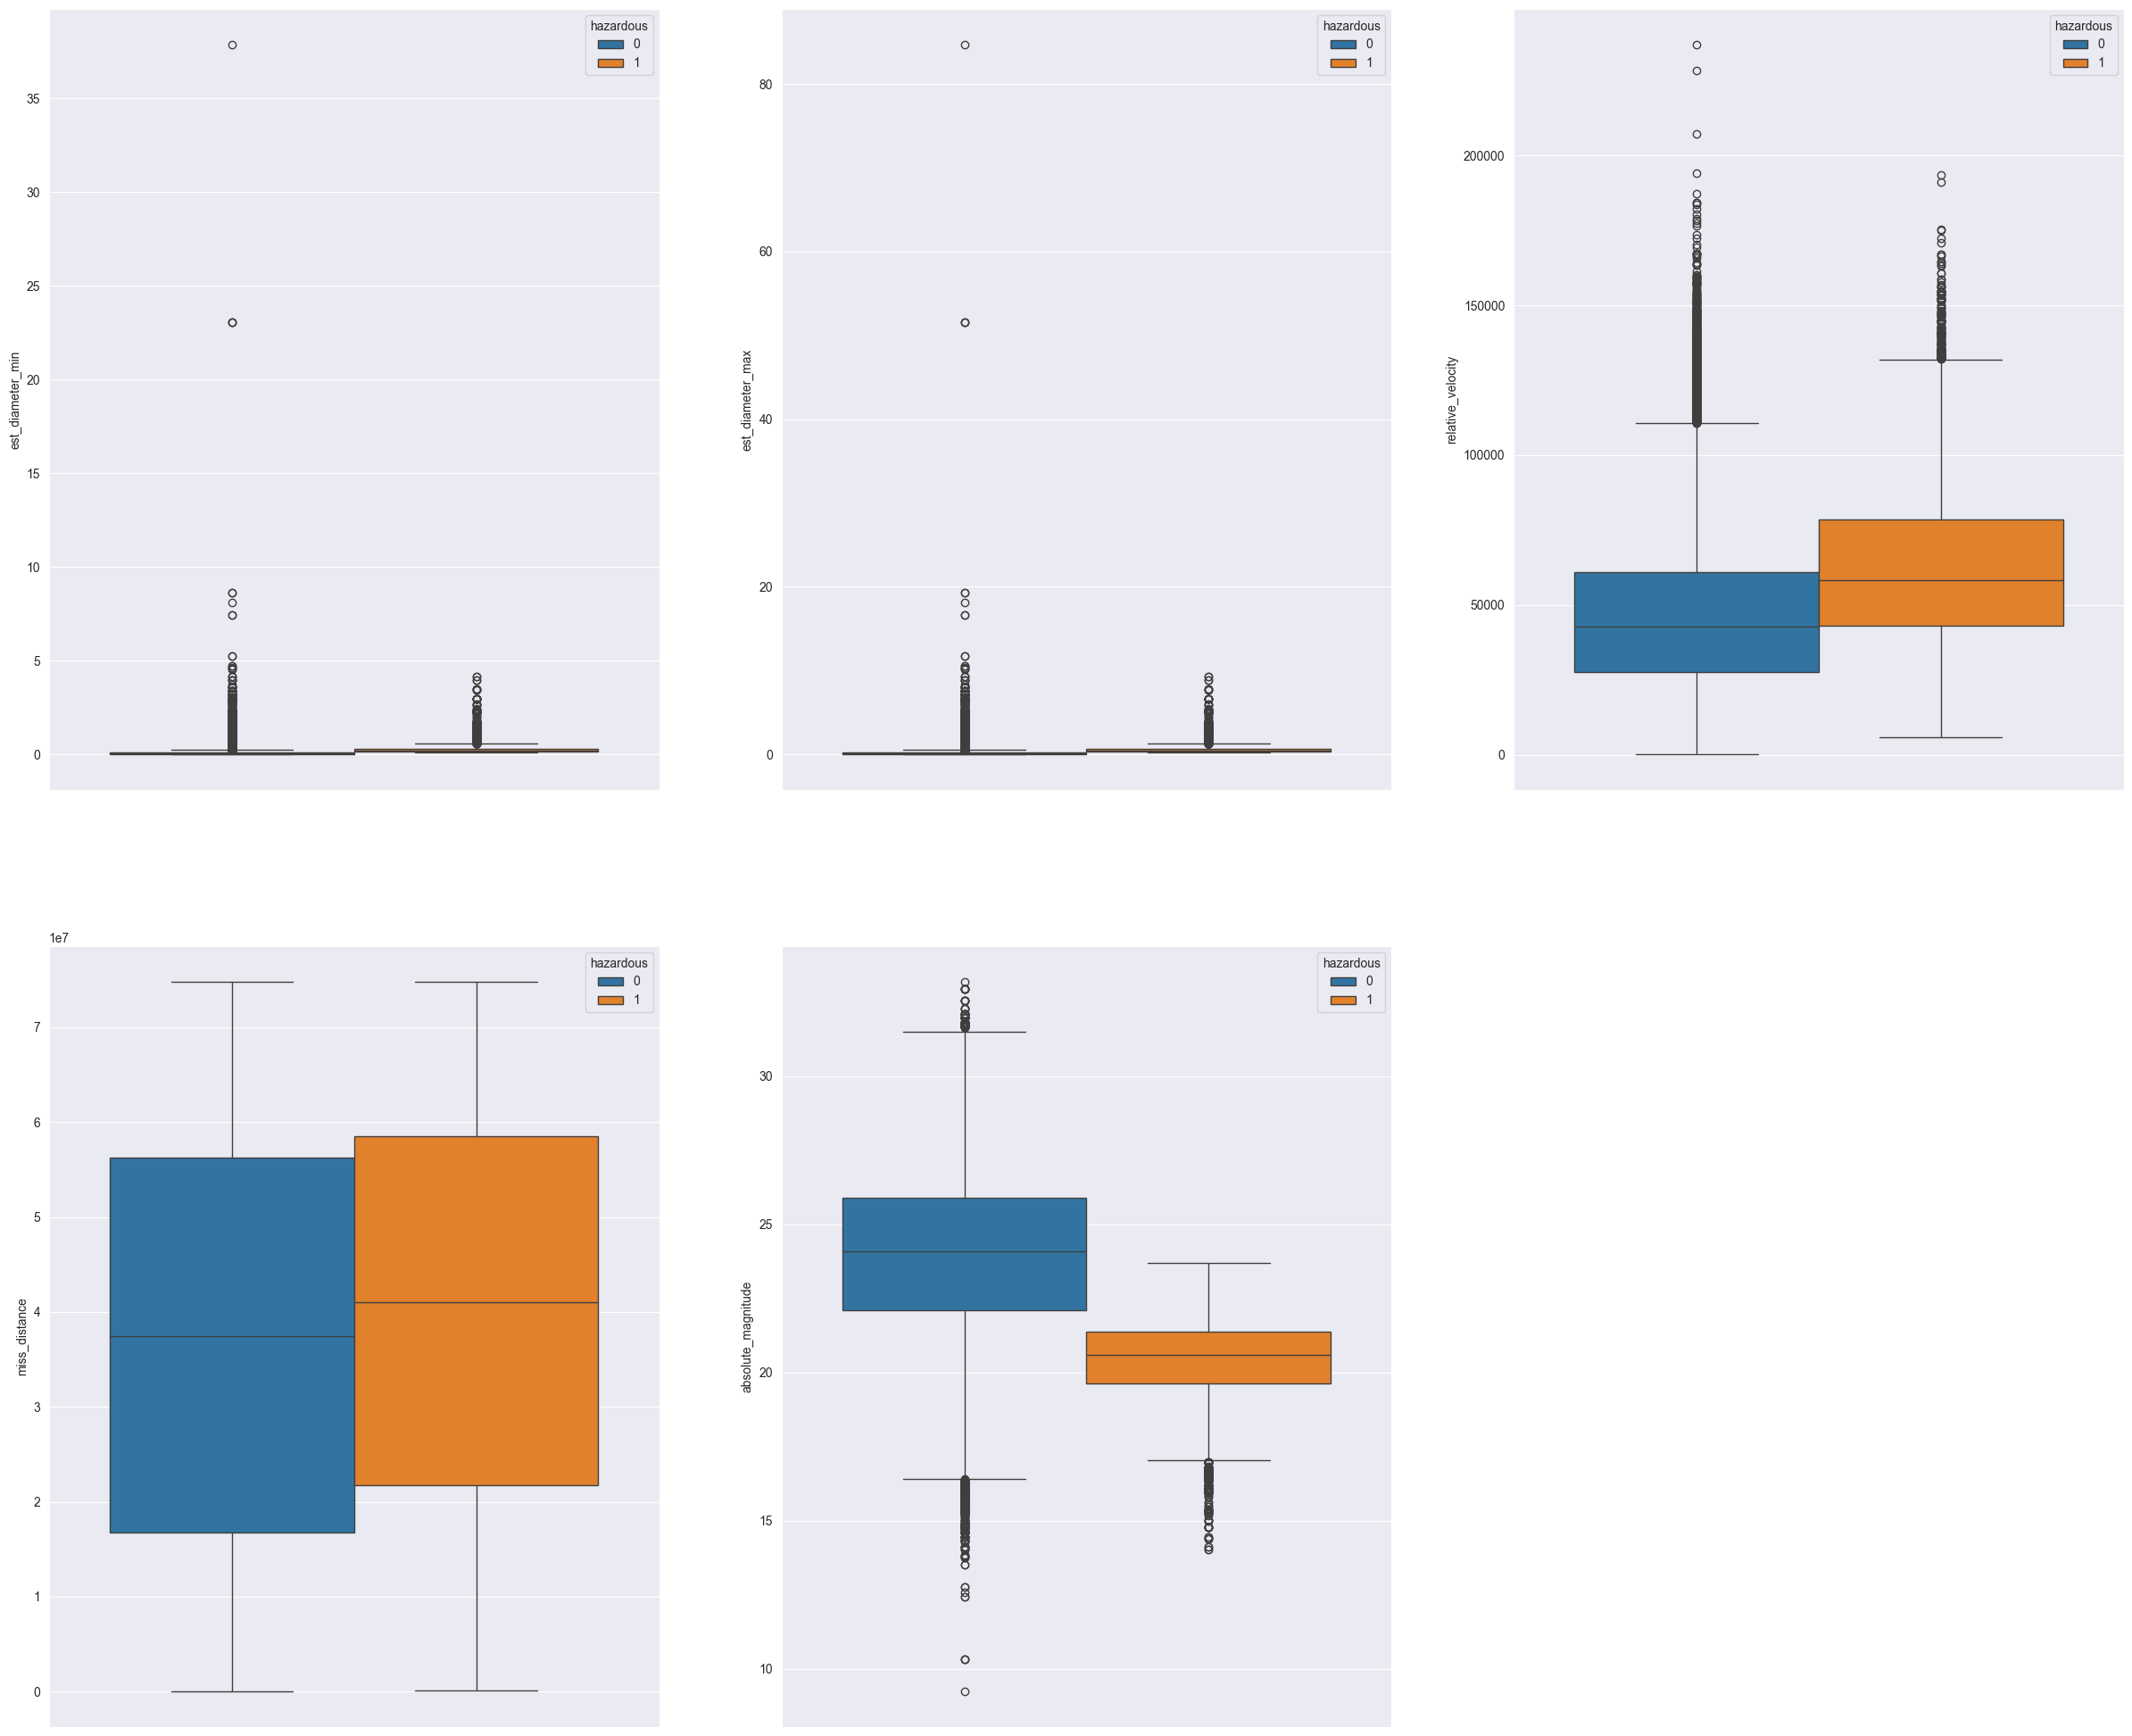

In [68]:
fig, ax = plt.subplots(2, 3, figsize = (30, 25))
ax_flatten = ax.flatten()
for i in range(len(columns)):
    sns.boxplot(data, y=columns[i], ax=ax_flatten[i], hue="hazardous")
ax_flatten[i+1].set_visible(False)

Из графиков для `est_diameter_min`, `est_diameter_max` видно, что среди объектов есть особенно большие. Причем самые большие объекты не являются опасными.

Из графика для `relative_velocity` видно, что медианное значение скорости для опасных объектов больше, чем медианное значение скорости для неопасных объектов. Объекты с особо высокими скоростями не являются опасными.

Из графика для `miss_distance` видно, что расстояния пролета для опасных и неопасных объектов практически одинаково.

Из графика для `absolute_magnitude` видно, что для опасных объектов абсолютная звездная величина лежит в меньшем диапазоне, чем неопасные объекты. Медианное значение для опасных объектов меньше, чем для неопасных объектов.

Из графиков для `est_diameter_min`, `est_diameter_max`, `relative_velocity` и `absolute_magnitude` видно, что данные содержат выбросы. Проанализируем их.



`est_diameter_min`

Предполагаемые выбросы лежат в диапазоне от 0.2 до 37. Вероятно, что это аномальные значения, а не выбросы, так как это допустимый размер диаметра для космических объектов.

`est_diameter_max`

Предполагаемые выбросы лежат в диапазоне от 0.2 до 80. Это допустимые значения для диаметра астероида, поэтому значения не являются выбросами.

`relative_velocity`

Предполагаемые выбросы лежат в диапазоне от 110 тыс. до 210 тыс. Такая скорость вполне возможна для аномально быстрых межзвездных объектов, поэтому эти значения не являются выбросами.

`absolute_magnitude`

Предполагаемые выбросы лежат в диапазонах от 0 до 18 и от 35 до 40. Такие значения возможны для космических объектов, поэтому эти значения являются аномальными.

Исследуем значения est_diameter_min и est_diameter_max для особо мелких объектов с величиной диаметра меньше, чем 0.5.

<Axes: ylabel='est_diameter_min'>

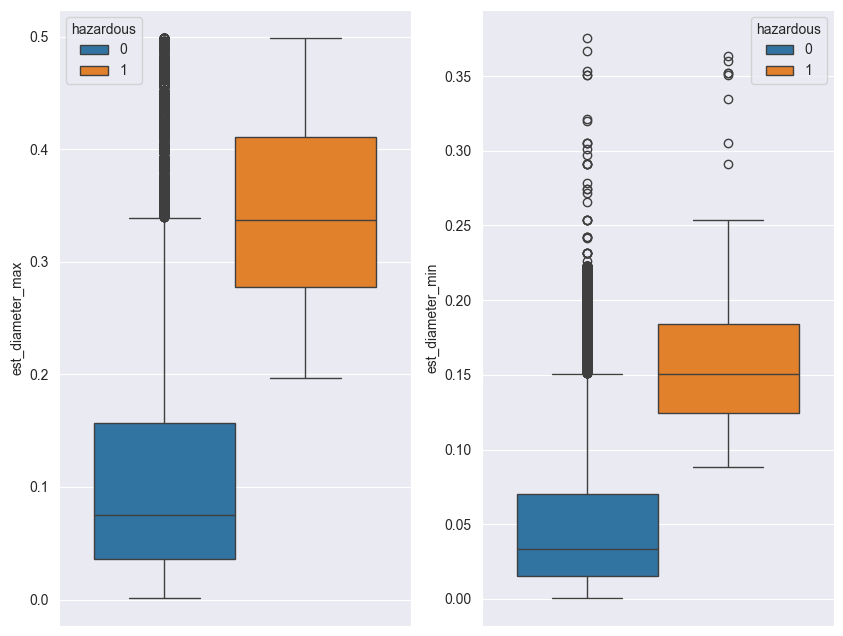

In [69]:
small_objects = data[(data["est_diameter_max"] <= 0.5) & (data["est_diameter_min"] <= 0.5)]

fig, ax = plt.subplots(1, 2, figsize = (10, 8))
sns.boxplot(small_objects, y="est_diameter_max", ax=ax[0], hue="hazardous")
sns.boxplot(small_objects, y="est_diameter_min", ax=ax[1], hue="hazardous")

Можно заметить, что в группе небольших астероидов опасны те, которые в среднем имеют более крупный размер.

## Стандартизация и масштабирование

Выполним логарифмирование для переменных `est_diameter_max`, `est_diameter_min`, так как эти величины обладают большим размахом значений.

In [70]:
log_data = data.copy()

log_columns = ["est_diameter_max", "est_diameter_min"]
for column in log_columns:
    log_data[column] = np.log(log_data[column])
log_data

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,-4.134165,-3.329446,56014.078517,1.024333e+06,26.10,0
1,-3.489441,-2.684722,7864.348060,3.268186e+07,24.70,0
2,-2.890769,-2.086050,55257.544508,6.538636e+07,23.40,0
3,-3.949958,-3.145239,41531.404722,1.260796e+07,25.70,0
4,-1.969735,-1.165016,67639.394481,7.130590e+07,21.40,0
...,...,...,...,...,...,...
90831,-4.042062,-3.237343,23264.740825,1.635007e+06,25.90,0
90832,-2.199993,-1.395275,24802.519406,3.351901e+07,21.90,0
90833,-3.351286,-2.546567,116288.999548,5.471396e+07,24.40,0
90834,-3.121028,-2.316309,45763.317060,2.694877e+07,23.90,0


Выполним нормировку данных.

array([[<Axes: title={'center': 'est_diameter_min'}>,
        <Axes: title={'center': 'est_diameter_max'}>],
       [<Axes: title={'center': 'relative_velocity'}>,
        <Axes: title={'center': 'miss_distance'}>],
       [<Axes: title={'center': 'absolute_magnitude'}>,
        <Axes: title={'center': 'hazardous'}>]], dtype=object)

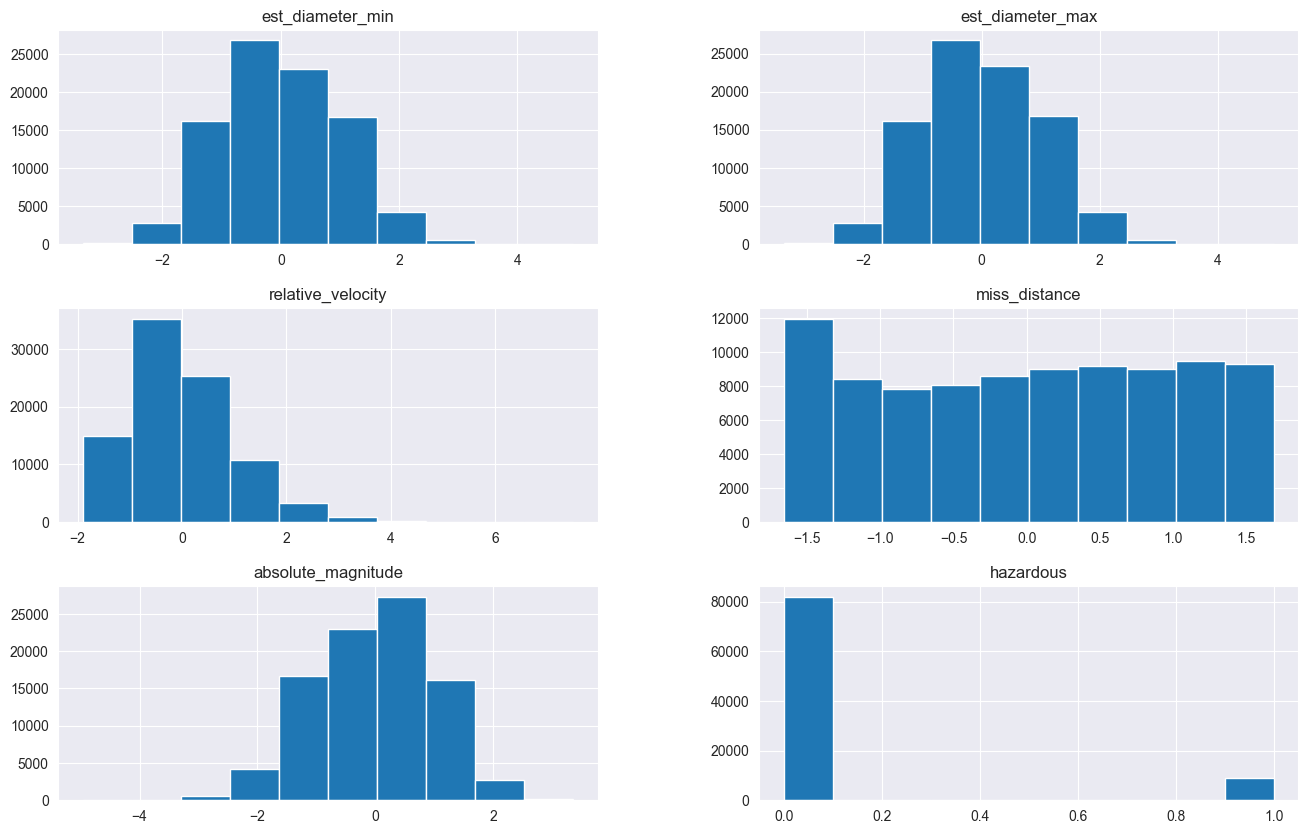

In [71]:
for column in columns:
    log_data[column] = (log_data[column] - log_data[column].mean())/log_data[column].std()

log_data.hist(figsize=(16, 10))

# Итог

`est_diameter_max` и `est_diameter_min` дают представление о примерном размере объекта с помощью верхней и нижней оценки соответственно. При этом две этих переменные сильно коррелируют друг с другом, значит, они линейно зависимы. Значит, при обучении модели можно обойтись только одной из данных переменных, например, использовать только верхнюю оценку.

Кроме того, в ходе исследования стало ясно, что опасные объекты могут быть разных размеров. В группе небольших астероидов (с диаметром меньше 0.5 км) опасными являются только особо крупные из данной группы. Рассматривая астероиды глобально более крупного размера, можно заметить, что они могут оказаться как неопасными, так и опасными. Возможно, что это связано со скоростью объектов, так как самые быстрые объекты имели небольшие размеры.

`relative_velocity`

В среднем опасные объекты обладают более высокой скоростью, чем неопасные. Наиболее быстрыми являются те объекты, которые не превышают 20 км в диаметре. При этом высокой скоростью могут обладать и неопасные объекты. Так, объекты с особо высокой скоростью примерно 200000 км/ч являются неопасными. Кроме того, объекты с более низкой скоростью обладают большей абсолютной звездной величиной, чем объекты с высокой скоростью.

`miss_distance`

Данный показатель практически не влияет на классификацию объектов по степени опасности. Опасные объекты могут находиться как близко к Земле, так и далеко от нее. С увеличением `relative_velocity` увеличивается показатель `miss_distance`, так как с увеличением относительной скорости увеличивается расстояние пролета объекта.

`absolute_magnitude`

Опасные объекты обладают низкой абсолютной магнитудой, лежащей в диапазоне от 23 до 25. При этом значение `absolute_magnitude` связано обратной пропорциональностью с размерами объекта - чем больше объект, тем меньшей абсолютной звездной величиной он обладает.

Подводя итог, можно сделать выводом о том, что ключевым параметром в оценке опасности объекта является параметр `absolute_magnitude`. Кроме того, на опасность объекта также оказывает влияние и величина его скорости `relative_velocity`. На опасность объекта также влияют параметры размерности  `est_diameter_max` и `est_diameter_min`.

Таким образом, опасными являются те объекты, которые обладают низкими показателями абсолютной звездной величины, небольшими размерами и высокой скоростью.


## MindMap


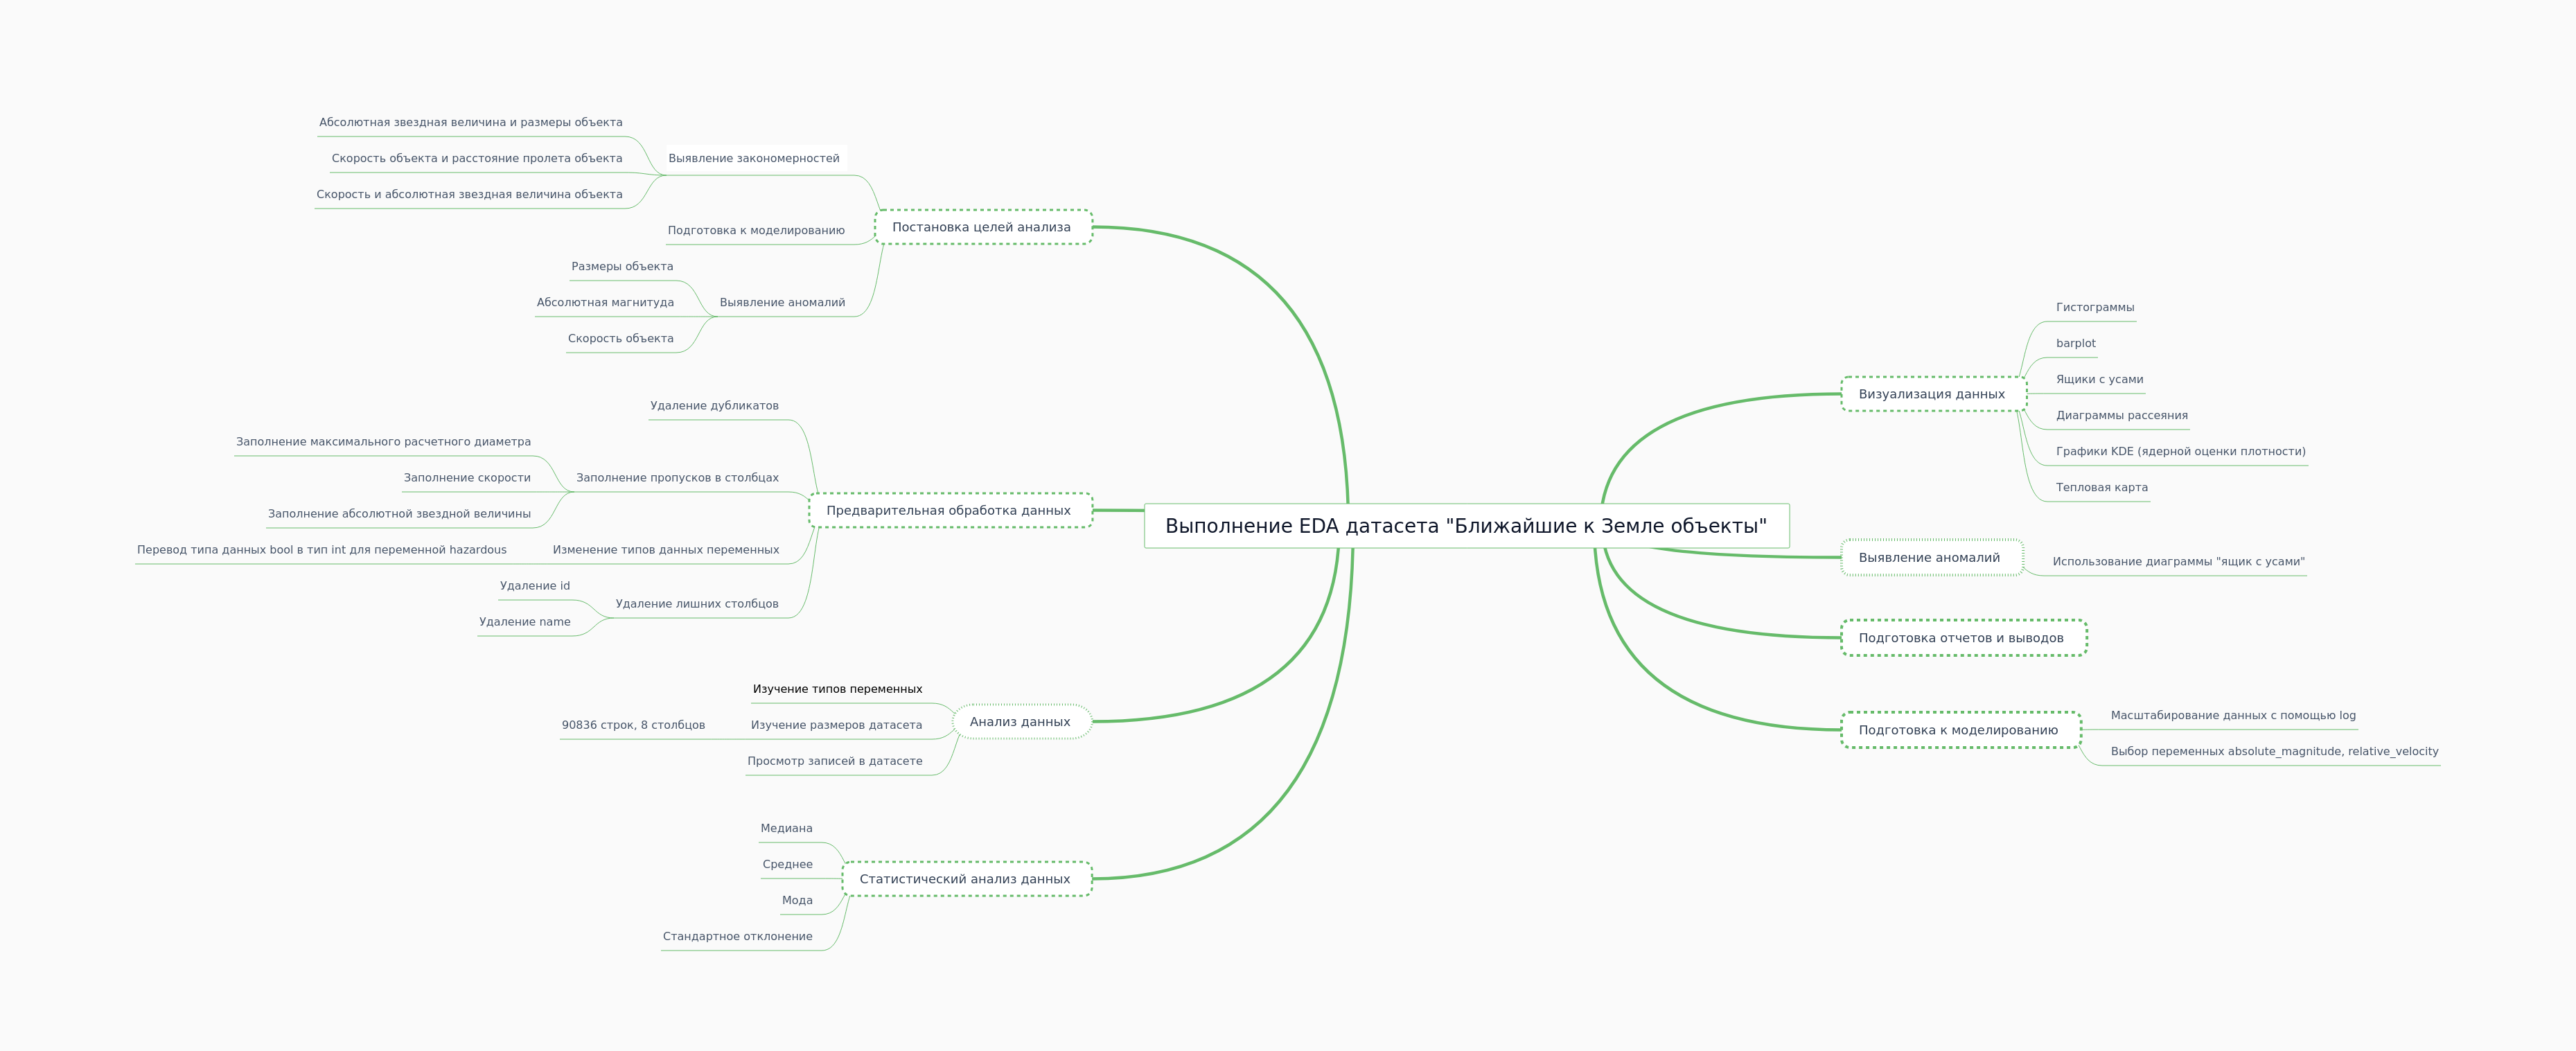

In [72]:
Image(filename='pictures/1.png')